# modelos lineales clasificacion

In [122]:
# Import data and modules
import numpy as np
from sklearn import datasets
from sklearn import preprocessing

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

scaler = preprocessing.StandardScaler().fit(X)
X_norm = scaler.transform(X)

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [124]:
print('Existen {} muestras en el conjunto de entrenamiento y {} muestras en el conjunto de test'.format(
X_train.shape[0], X_test.shape[0]))

Existen 105 muestras en el conjunto de entrenamiento y 45 muestras en el conjunto de test


In [125]:
for z in {c:np.sum(y_train==c) for c in np.unique(y_train)}.items():
    print('Existen {} muestras de la clase {}'.format(z[1],z[0]))

Existen 34 muestras de la clase 0
Existen 32 muestras de la clase 1
Existen 39 muestras de la clase 2


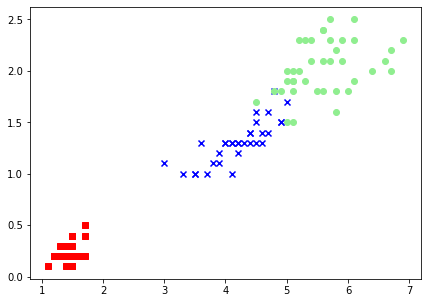

In [203]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_boundary(clf):
    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X_test[:, 0].min() , X_test[:, 0].max()
    y_min, y_max = X_test[:, 1].min() , X_test[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # Plot also the training points
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    for idx, cl in enumerate(np.unique(y_test)):
        plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                    marker=markers[idx], label=cl,color=colors[idx])

        # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)
        
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
plt.figure(figsize=(7,5))
for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(x=X_train[y_train == cl, 0], y=X_train[y_train == cl, 1], marker=markers[idx], label=cl,color=colors[idx])

Ahora ajustamos un modelo lineal de clasificacion con regularizacion (c es el inverso del parametro de regularizacion)

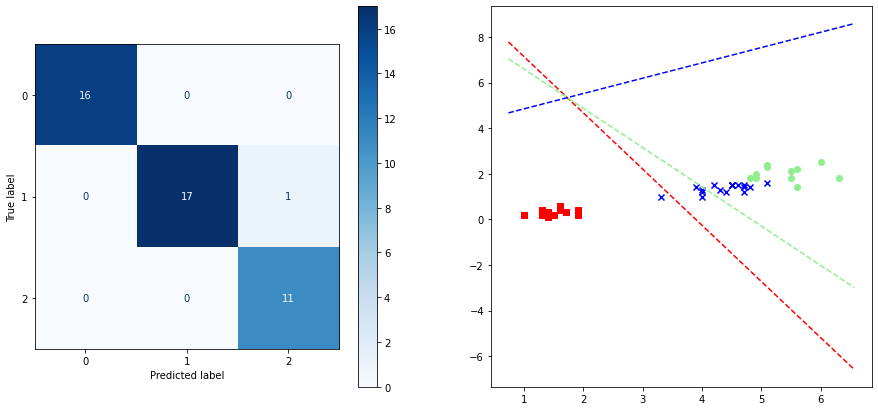

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
    
clf_l2 = LogisticRegression(penalty='l2',C=0.1,multi_class='multinomial').fit(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
plot_confusion_matrix(clf_l2, X_test, y_test,cmap=plt.cm.Blues,ax=ax1)
plot_decision_boundary(clf_l2)

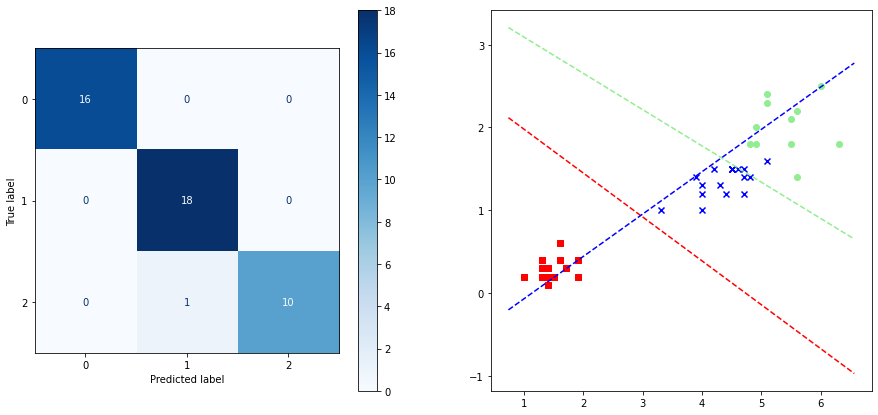

In [258]:
from sklearn.linear_model import SGDClassifier

clf_sgd = SGDClassifier(loss="log", alpha=0.0001,penalty='l2',
                        max_iter=1e5,learning_rate='optimal',eta0=1e-1).fit(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
plot_confusion_matrix(clf_sgd, X_test, y_test,cmap=plt.cm.Blues,ax=ax1)
plot_decision_boundary(clf_sgd)

In [259]:
from sklearn.metrics import classification_report

y_pred=clf_sgd.predict_proba(X_test)

print(classification_report(y_test, y_pred.argmax(axis=1)))

print('SGD AUC score :',roc_auc_score(y_test, y_pred,multi_class='ovr'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.90      1.00      0.95        18
           2       1.00      0.82      0.90        11

    accuracy                           0.96        45
   macro avg       0.97      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45

SGD AUC score : 1.0


In [260]:
y_pred=clf_l2.predict_proba(X_test)

print(classification_report(y_test, y_pred.argmax(axis=1)))

print('L2 AUC score :',roc_auc_score(y_test, y_pred,multi_class='ovr'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

L2 AUC score : 0.9968457266932212


# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir la supervivencia de un paciente infectado con COVID usando datos epidemiologicos (Datos obtenidos desde [1]).
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo usando feature engineering y regularizacion.

[1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7306186/#!po=54.1667

In [407]:
import pandas as pd

patient_info=pd.read_csv('https://storage.googleapis.com/kagglesdsdata/datasets%2F527325%2F1332417%2FPatientInfo.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1595898029&Signature=m%2FgJKDnFGUf718wQ6FBlMnq5GymivD3McWahAjxCwKsNyDn4cklQkd7EnDu5Qb8fGbJIiqSrW5rv3Szpn6JWqTg5zvhpadc9Zn2QkHT8UKTje%2BvVYXOHiAPWG0JPz3dvOnmv4BphgHujr34EHp16%2Fu8b%2Fx7k1CnXghbgUtMW9Afrako6aaKLHGjlZtDJJ5FTzblxFDBhM2FHpiFDE%2Fzd5OkD1vcSPkPGyLL2yDqxsvp0gAfz0w3F6ry%2Fde3weXHPl9th8aXjSCSnkIYrNuyllZAMx14aUoa1QkY7QIRQH%2Fn%2FiSG6qCbyZCWfeUlRA6z%2F8unp9444sN6UdVeskSAkig%3D%3D')

In [408]:
patient_info.head()


,patient_id,sex,age,country,...,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,...,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,...,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,...,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,...,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,...,2020-01-31,2020-02-24,NaN,released
